In [1]:
!pip3 install -r ./requirements.txt > pip-log.txt

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from google.cloud import storage
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import os
import sys

sys.path.append('/Users/maitrai.kansal/Downloads/hw4')

import ML_analysis

%load_ext google.cloud.bigquery

In [3]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'homework4-key.json'

In [4]:
%%bigquery cms_df

select tbl1.*, tbl2.drg_definition, hospital_referral_region_description, total_discharges, average_covered_charges, tbl2.average_total_payments as inpatient_average_total_payments, average_medicare_payments, apc, hospital_referral_region, outpatient_services, average_estimated_submitted_charges, tbl3.average_total_payments from (select * from `bigquery-public-data.cms_medicare.nursing_facilities_2014`) tbl1 left join (select * from `bigquery-public-data.cms_medicare.inpatient_charges_2014`) as tbl2 on tbl1.provider_id = tbl2.provider_id left join (select * from `bigquery-public-data.cms_medicare.outpatient_charges_2014`) as tbl3 on tbl1.provider_id = tbl3.provider_id ;


In [5]:
cms_df = cms_df.fillna(0)

In [6]:
state_wise = cms_df.groupby(['state']).mean()

Text(0.5,1,'Correlation between Average HCC Score vs Total Medicare Standard Payment')

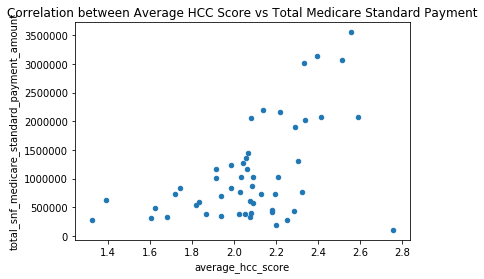

In [7]:
ax = state_wise.plot(kind='scatter',x='average_hcc_score', y='total_snf_medicare_standard_payment_amount')
ax.set_title('Correlation between Average HCC Score vs Total Medicare Standard Payment')

Text(0.5,1,'Correlation between Total Stays vs Total Medicare Standard Payment')

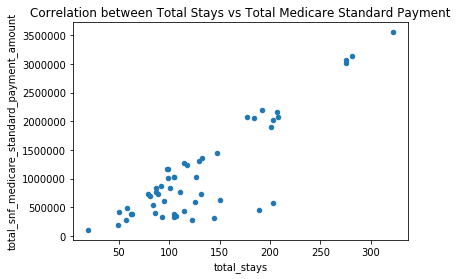

In [8]:
ax = state_wise.plot(kind='scatter',x='total_stays', y='total_snf_medicare_standard_payment_amount')
ax.set_title('Correlation between Total Stays vs Total Medicare Standard Payment')

## Regression Technique for Cost Prediction Using Random Forest
In order to predict costs per facility/provider, we have applied random forest regression. Since there are numerous features, we have levied feature importance and found top 5 contibutors towards the cost incurred by medicare.

For random forest we dropped the irrelevant columns such as hospital/facility_name, street, address, zipcode, etc. value to be predicted is the cost of total medicare standard payment amount.

For hyperparameter tuning, we trained the models with different n_estimators(in an increasing fashion) and selected the one after which there was no improvement in the accuracy score.

Inference: totals_stays and outpatient_services were the top contibutors towards predicting the cost of a facility for the year 2014.

In [9]:
ML_analysis.rf_prediction(cms_df)

/Users/maitrai.kansal/Downloads/hw4/ML_analysis.py:71: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


KeyboardInterrupt: 

The predicted value overlaps with the actual value of total medicare standard payment, The accuracy of the model is 74% approx. 


## Clustering Technique Using KMeans 

We have applied Kmeans clustering algorithm to find distinct group of facilities which has a certain common features.
Upon training the model with different values of K(clusters), we choose 3 clusters as they were somewhat better delieanated than others

This will help to identify the Hospitals having similar features(characteristics). For this analysis, we have removed the non-numeric columns and dropped the missing values as a part of preprocessing the data.

Common features of the clusters that we analysed are:

1. Average HCC Score
2. Total Stays
3. Distinct Beneficiaries Per Provider
4. Total Medicare Payment Amount
5. Average Age

2.0107010926119706
   cluster_1  cluster_2  cluster_3
0   2.010701   2.300514        NaN


KeyError: 'total_snf_medicare_standard_payment_amount'

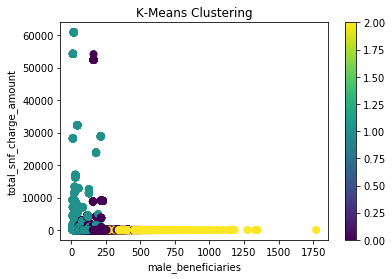

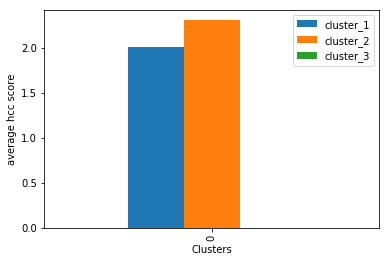

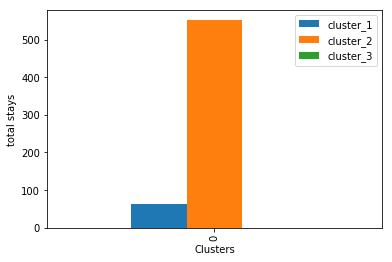

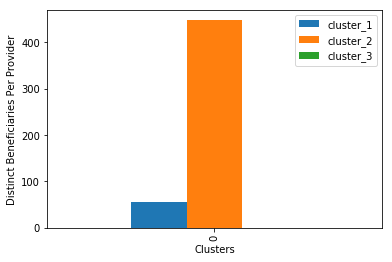

In [9]:
ML_analysis.kmeans_clustering(cms_df)

This plot depicts a linear relationship between total_stays in all facilities per state and total_snf_medicare_standard_payment_amount

## Regression Technique for Cost Prediction Using Random Forest

In order to predict costs per facility/provider, we have applied random forest regression. Since there are numerous features, we have levied feature importance and found top 5 contibutors towards the cost incurred by medicare.

For random forest we dropped the irrelevant columns such as hospital/facility_name, street, address, zipcode, etc.
value to be predicted is the cost of total medicare standard payment amount.

For hyperparameter tuning, we trained the models with different n_estimators(in an increasing fashion) and selected the one after which there was no improvement in the accuracy score.

Inference: totals_stays and outpatient_services were the top contibutors towards predicting the cost of a facility for the year 2014.